# Code plotting mass change over time


In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox


In [2]:
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 'medium'
plt.rcParams['ytick.labelsize'] = 'medium'
plt.rcParams['legend.fontsize'] = 20


### Import data

Obtain mass change estimates (transcribed from Mass_Change data sheet)

In [3]:
# Read the Excel file into a DataFrame
mass_change_fp = '/path/to/Mass_Change.xlsx'
mass_change_df = pd.read_excel(mass_change_fp, sheet_name='Mass Change', skiprows=2, header=None) 


In [4]:
mass_change_df

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,NaN,NaN,Time Span,NaN,Kennicott Terminus,NaN,NaN,NaN,NaN,NaN,...,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Start,End,km3,km3_err,km3/yr,km3/yr_err,Mt/yr,Mt/yr_err,...,km3,km3_err,km3/yr,km3/yr_err,Mt/yr,Mt/yr_err,m/yr,m/yr_err,m w.e./yr,mwe/yr_err
2,NaN,NaN,1938,1957,0.21,0.312212,0.011053,0.016432,9.947368,14.799311,...,--,--,--,--,--,--,--,--,--,--
3,NaN,NaN,1957,1978,-0.124,0.052688,-0.005905,0.002509,-5.314286,2.277276,...,-1.247,0.004,-0.059381,0.00019,-53.442857,2.973993,-0.396666,0.017799,-0.357,-0.025494
4,NaN,NaN,1978,2004,-0.853,0.107868,-0.032808,0.004149,-29.526923,4.078335,...,-2.963,0.029,-0.113962,0.001115,-102.565385,5.785826,-0.761266,0.034877,-0.68514,-0.049336
5,NaN,NaN,2004,2012,-0.255,0.1102,-0.031875,0.013775,-28.6875,12.499522,...,-1.782,0.035,-0.22275,0.004375,-200.475,11.813036,-1.531981,0.076738,-1.378783,-0.103137
6,NaN,NaN,2012,2018,-0.157,NaN,-0.026167,NaN,-23.55,1.308333,...,--,--,--,--,--,--,--,--,--,--
7,NaN,NaN,2012,2023,-0.274,0.019782,-0.024909,0.001798,-22.418182,2.042251,...,-2.200981,0.005,-0.200089,0.000455,-180.080244,10.012819,-1.418066,0.066409,-1.27626,-0.092733
8,NaN,NaN,2010,2020,-0.27,NaN,-0.027,NaN,-24.37,NaN,...,-1.85,NaN,NaN,NaN,-166.91,NaN,-1.314,NaN,-1.18292,NaN
9,NaN,NaN,1957 Area (km2),NaN,17.8,NaN,NaN,NaN,NaN,NaN,...,149.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.7


### Extract volume, elevation, and mass change from data

In [5]:
# DATES
start_dates = list(mass_change_df[2][2:8])
end_dates = list(mass_change_df[3][2:8])
mid_dates = [(d1 + d2)/2 for d1, d2 in zip(start_dates, end_dates)]
full_dates = start_dates.copy()
full_dates.append(end_dates[-1])
full_dates.pop(5)
print()


In [6]:
# KENNICOTT TERMINUS DATA
kenn_term_area = mass_change_df[4][9] # sq.km
kenn_term_area_err = mass_change_df[13][9]

# volumetric change (cu.km; error)
dV_1938_1957_term, dV_1957_1978_term, dV_1978_2004_term, dV_2004_2012_term, dV_2012_2018_term, dV_2012_2023_term = list(mass_change_df[4][2:8])
dV_1938_1957_term_err, dV_1957_1978_term_err, dV_1978_2004_term_err, dV_2004_2012_term_err, dV_2012_2018_term_err, dV_2012_2023_term_err = list(mass_change_df[5][2:8])

# elevation change (m/yr)
dH_1938_1957_term, dH_1957_1978_term, dH_1978_2004_term, dH_2004_2012_term, dH_2012_2018_term, dH_2012_2023_term = list(mass_change_df[10][2:8])
dH_1938_1957_term_err, dH_1957_1978_term_err, dH_1978_2004_term_err, dH_2004_2012_term_err, dH_2012_2018_term_err, dH_2012_2023_term_err = list(mass_change_df[11][2:8])

# mass change (Mt/yr)
dM_1938_1957_term, dM_1957_1978_term, dM_1978_2004_term, dM_2004_2012_term, dM_2012_2018_term, dM_2012_2023_term = list(mass_change_df[8][2:8])
dM_1938_1957_term_err, dM_1957_1978_term_err, dM_1978_2004_term_err, dM_2004_2012_term_err, dM_2012_2018_term_err, dM_2012_2023_term_err = list(mass_change_df[9][2:8])

# mass balance (mm w.e./yr)
dB_1938_1957_term, dB_1957_1978_term, dB_1978_2004_term, dB_2004_2012_term, dB_2012_2018_term, dB_2012_2023_term = list(mass_change_df[12][2:8])
dB_1938_1957_term_err, dB_1957_1978_term_err, dB_1978_2004_term_err, dB_2004_2012_term_err, dB_2012_2018_term_err, dB_2012_2023_term_err = list(mass_change_df[13][2:8])


In [7]:
# KENNICOTT FULL ABLATION AREA DATA
kenn_area = mass_change_df[14][9] # sq.km
kenn_area_err = mass_change_df[23][9]

# volumetric change (cu.km; error)
dV_1957_1978_kenn, dV_1978_2004_kenn, dV_2004_2012_kenn, _, dV_2012_2023_kenn = list(mass_change_df[14][3:8])
dV_1957_1978_kenn_err, dV_1978_2004_kenn_err, dV_2004_2012_kenn_err, _, dV_2012_2023_kenn_err = list(mass_change_df[15][3:8])

# elevation change (m/yr)
dH_1957_1978_kenn, dH_1978_2004_kenn, dH_2004_2012_kenn, _, dH_2012_2023_kenn = list(mass_change_df[20][3:8])
dH_1957_1978_kenn_err, dH_1978_2004_kenn_err, dH_2004_2012_kenn_err, _, dH_2012_2023_kenn_err = list(mass_change_df[21][3:8])

# mass change (Mt/yr)
dM_1957_1978_kenn, dM_1978_2004_kenn, dM_2004_2012_kenn, _, dM_2012_2023_kenn = list(mass_change_df[18][3:8])
dM_1957_1978_kenn_err, dM_1978_2004_kenn_err, dM_2004_2012_kenn_err, _, dM_2012_2023_kenn_err = list(mass_change_df[19][3:8])

# mass balance (mm w.e./yr)
dB_1957_1978_kenn, dB_1978_2004_kenn, dB_2004_2012_kenn, _, dB_2012_2023_kenn = list(mass_change_df[22][3:8])
dB_1957_1978_kenn_err, dB_1978_2004_kenn_err, dB_2004_2012_kenn_err, _, dB_2012_2023_kenn_err = list(mass_change_df[23][3:8])


In [8]:
# ROOT FULL ABLATION AREA DATA
root_area = mass_change_df[24][9] # sq.km
root_area_err = mass_change_df[33][9]

# volumetric change (cu.km; error)
dV_1957_1978_root, dV_1978_2004_root, dV_2004_2012_root, _, dV_2012_2023_root = list(mass_change_df[24][3:8])
dV_1957_1978_root_err, dV_1978_2004_root_err, dV_2004_2012_root_err, _, dV_2012_2023_root_err = list(mass_change_df[25][3:8])

# elevation change (m/yr)
dH_1957_1978_root, dH_1978_2004_root, dH_2004_2012_root, _, dH_2012_2023_root = list(mass_change_df[30][3:8])
dH_1957_1978_root_err, dH_1978_2004_root_err, dH_2004_2012_root_err, _, dH_2012_2023_root_err = list(mass_change_df[31][3:8])

# mass change (Mt/yr)
dM_1957_1978_root, dM_1978_2004_root, dM_2004_2012_root, _, dM_2012_2023_root = list(mass_change_df[28][3:8])
dM_1957_1978_root_err, dM_1978_2004_root_err, dM_2004_2012_root_err, _, dM_2012_2023_root_err = list(mass_change_df[29][3:8])

# mass balance (mm w.e./yr)
dB_1957_1978_root, dB_1978_2004_root, dB_2004_2012_root, _, dB_2012_2023_root = list(mass_change_df[32][3:8])
dB_1957_1978_root_err, dB_1978_2004_root_err, dB_2004_2012_root_err, _, dB_2012_2023_root_err = list(mass_change_df[33][3:8])


In [9]:
# TOTAL AREA COVERAGE (ABLATION AREA)
tot_area = mass_change_df[34][9] # sq.km
tot_area_err = mass_change_df[43][9]

# volumetric change (cu.km; error)
dV_1957_1978_tot, dV_1978_2004_tot, dV_2004_2012_tot, _, dV_2012_2023_tot = list(mass_change_df[34][3:8])
dV_1957_1978_tot_err, dV_1978_2004_tot_err, dV_2004_2012_tot_err, _, dV_2012_2023_tot_err = list(mass_change_df[35][3:8])

# elevation change (m/yr)
dH_1957_1978_tot, dH_1978_2004_tot, dH_2004_2012_tot, _, dH_2012_2023_tot = list(mass_change_df[40][3:8])
dH_1957_1978_tot_err, dH_1978_2004_tot_err, dH_2004_2012_tot_err, _, dH_2012_2023_tot_err = list(mass_change_df[41][3:8])

# mass change (Mt/yr)
dM_1957_1978_tot, dM_1978_2004_tot, dM_2004_2012_tot, _, dM_2012_2023_tot = list(mass_change_df[38][3:8])
dM_1957_1978_tot_err, dM_1978_2004_tot_err, dM_2004_2012_tot_err, _, dM_2012_2023_tot_err = list(mass_change_df[39][3:8])

# mass balance (mm w.e./yr)
dB_1957_1978_tot, dB_1978_2004_tot, dB_2004_2012_tot, _, dB_2012_2023_tot = list(mass_change_df[42][3:8])
dB_1957_1978_tot_err, dB_1978_2004_tot_err, dB_2004_2012_tot_err, _, dB_2012_2023_tot_err = list(mass_change_df[43][3:8])


### Plot results


In [10]:
colors = ['#8c510a', '#bf812d', '#5ab4ac']


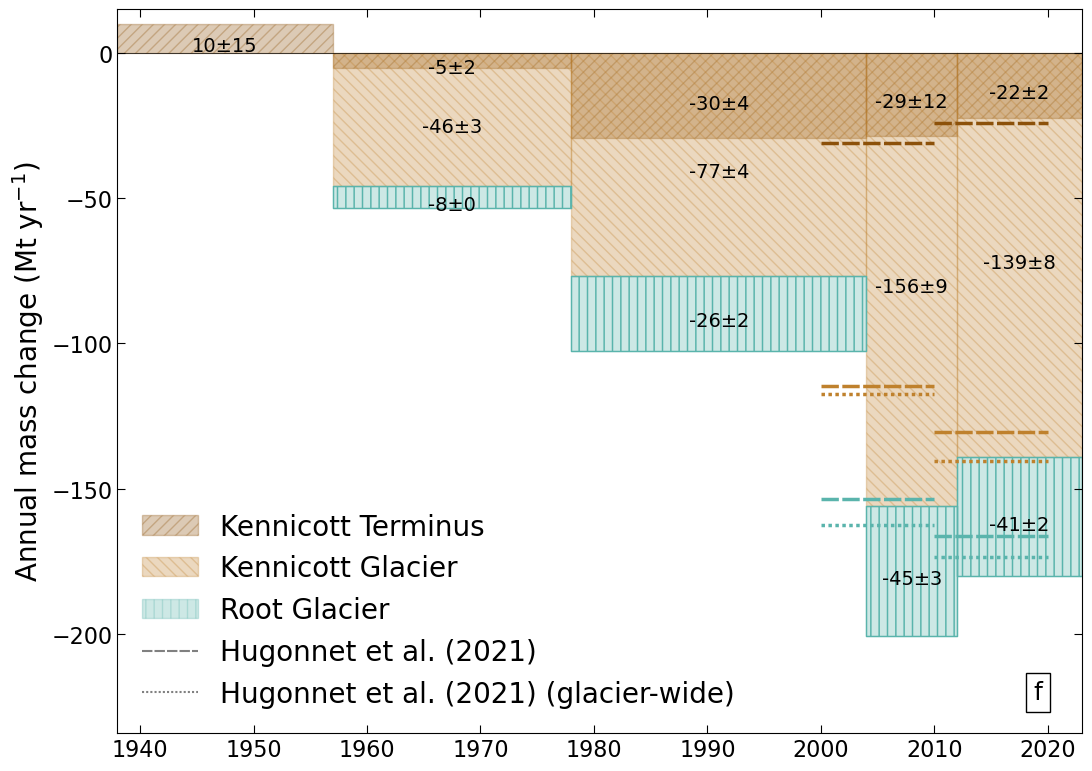

In [11]:
fig, ax1 = plt.subplots(1, 1, figsize=(11.2, 8))

# --- --- --- LINE PLOTS --- --- ---
# Volumetric Mass Loss Plot
a = 0.3
f1 = ax1.fill_between([full_dates[0], full_dates[1]], dM_1938_1957_term, 0, color=colors[0], hatch='///', alpha=a, label='Kennicott Terminus')
f2 = ax1.fill_between([full_dates[1], full_dates[2]], dM_1957_1978_term, 0, color=colors[0], hatch='///', alpha=a)
f3 = ax1.fill_between([full_dates[2], full_dates[3]], dM_1978_2004_term, 0, color=colors[0], hatch='///', alpha=a)
f4 = ax1.fill_between([full_dates[3], full_dates[4]], dM_2004_2012_term, 0, color=colors[0], hatch='///', alpha=a)
f5 = ax1.fill_between([full_dates[4], full_dates[5]], dM_2012_2023_term, 0, color=colors[0], hatch='///', alpha=a)
f6 = ax1.fill_between([full_dates[1], full_dates[2]], dM_1957_1978_kenn, 0, color=colors[1], hatch='\\\\\\', alpha=a, label='Kennicott Glacier')
f7 = ax1.fill_between([full_dates[2], full_dates[3]], dM_1978_2004_kenn, 0, color=colors[1], hatch='\\\\\\', alpha=a)
f8 = ax1.fill_between([full_dates[3], full_dates[4]], dM_2004_2012_kenn, 0, color=colors[1], hatch='\\\\\\', alpha=a)
f9 = ax1.fill_between([full_dates[4], full_dates[5]], dM_2012_2023_kenn, 0, color=colors[1], hatch='\\\\\\', alpha=a)

f10 = ax1.fill_between([full_dates[1], full_dates[2]], dM_1957_1978_root + dM_1957_1978_kenn, dM_1957_1978_kenn,
                       color=colors[2], hatch='||', alpha=a, label='Root Glacier') #  $\Delta$M/$\Delta$t
f11 = ax1.fill_between([full_dates[2], full_dates[3]], dM_1978_2004_root + dM_1978_2004_kenn, dM_1978_2004_kenn,
                       color=colors[2], hatch='||', alpha=a)
f12 = ax1.fill_between([full_dates[3], full_dates[4]], dM_2004_2012_root + dM_2004_2012_kenn, dM_2004_2012_kenn,
                       color=colors[2], hatch='||', alpha=a)
f13 = ax1.fill_between([full_dates[4], full_dates[5]], dM_2012_2023_root + dM_2012_2023_kenn, dM_2012_2023_kenn,
                       color=colors[2], hatch='||', alpha=a)


# since this color for Root Glacier is so light, add it again
ax1.fill_between([full_dates[1], full_dates[2]], dM_1957_1978_root + dM_1957_1978_kenn, dM_1957_1978_kenn, fc='none', ec=colors[2], hatch='||', alpha=1)
ax1.fill_between([full_dates[2], full_dates[3]], dM_1978_2004_root + dM_1978_2004_kenn, dM_1978_2004_kenn, fc='none', ec=colors[2], hatch='||', alpha=1)
ax1.fill_between([full_dates[3], full_dates[4]], dM_2004_2012_root + dM_2004_2012_kenn, dM_2004_2012_kenn, fc='none', ec=colors[2], hatch='||', alpha=1)
ax1.fill_between([full_dates[4], full_dates[5]], dM_2012_2023_root + dM_2012_2023_kenn, dM_2012_2023_kenn, fc='none', ec=colors[2], hatch='||', alpha=1)
# add text to these filled zones
fill_list_val = [dM_1938_1957_term, dM_1957_1978_term, dM_1978_2004_term, dM_2004_2012_term, dM_2012_2023_term, 
                 dM_1957_1978_kenn, dM_1978_2004_kenn, dM_2004_2012_kenn, dM_2012_2023_kenn, 
                 dM_1957_1978_root, dM_1978_2004_root, dM_2004_2012_root, dM_2012_2023_root]
fill_list_err = [dM_1938_1957_term_err, dM_1957_1978_term_err, dM_1978_2004_term_err, dM_2004_2012_term_err, dM_2012_2023_term_err, 
                 dM_1957_1978_kenn_err, dM_1978_2004_kenn_err, dM_2004_2012_kenn_err, dM_2012_2023_kenn_err, 
                 dM_1957_1978_root_err, dM_1978_2004_root_err, dM_2004_2012_root_err, dM_2012_2023_root_err]
fill_list_ax = [f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13]
round_num = 0 # decimals to round to
for f, v, e in zip(fill_list_ax, fill_list_val, fill_list_err):
    (x0, y0), (x1, y1) = f.get_paths()[0].get_extents().get_points()
    ax1.text((x0 + x1)/2, 0.7+(y0 + y1)/2, f'{v:.{round_num}f}±{e:.{round_num}f}', 
             ha='center', va='top', color='k', size=14, zorder=100)

# # --- --- --- ADD PREVIOUS STUDY DATA --- --- ---
# Hugonnet dhdt: 2000 - 2010 (ablation area)
ax1.hlines(-30.95, xmin=2000, xmax=2010, color=colors[0], ls=(0, (5, 1)), lw=2.5) # terminus
ax1.hlines(-114.59, xmin=2000, xmax=2010, color=colors[1], ls=(0, (5, 1)), lw=2.5) # kenn
ax1.hlines(-39.34 + (-114.59) + 0.4, xmin=2000, xmax=2010, color=colors[2], ls=(0, (5, 1)), lw=2.5) # root
# ax1.hlines(-153.93 - 0.4, xmin=2000, xmax=2010, color='black', ls=(0, (5, 1)), lw=2) # total
dhdt_leg, = ax1.plot([], [], ls=(0, (5, 1)), color='grey', label='Hugonnet et al. (2021)')

# Hugonnet dhdt: 2010 - 2020 (ablation area)
ax1.hlines(-24.34, xmin=2010, xmax=2020, color=colors[0], ls=(0, (5, 1)), lw=2.5) # terminus
ax1.hlines(-130.58, xmin=2010, xmax=2020, color=colors[1], ls=(0, (5, 1)), lw=2.5) # kenn
ax1.hlines(-35.91 + (-130.58) + 0.4, xmin=2010, xmax=2020, color=colors[2], ls=(0, (5, 1)), lw=2.5) # root
# ax1.hlines(-166.48 - 0.4, xmin=2010, xmax=2020, color='black', ls=(0, (5, 1)), lw=2) # total

# Hugonnet dhdt: 2000 - 2010 (full area)
ax1.hlines(-117.34, xmin=2000, xmax=2010, color=colors[1], ls=(0, (1, 1)), lw=2.5) # kenn
ax1.hlines(-45.55 + (-117.34) + 0.4, xmin=2000, xmax=2010, color=colors[2], ls=(0, (1, 1)), lw=2.5) # root
dhdt_leg, = ax1.plot([], [], ls=(0, (1, 1)), color='grey', label='Hugonnet et al. (2021) (glacier-wide)')

# Hugonnet dhdt: 2010 - 2020 (full area)
ax1.hlines(-140.57, xmin=2010, xmax=2020, color=colors[1], ls=(0, (1, 1)), lw=2.5) # kenn
ax1.hlines(-33.43 + (-140.57) + 0.4, xmin=2010, xmax=2020, color=colors[2], ls=(0, (1, 1)), lw=2.5) # root

ax1.axhline(0, color='k', ls='-', lw=0.5)
ax1.set_ylabel('Annual mass change (Mt yr$^{-1}$)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(-234,15)

# --- --- --- PLOT SETTINGS --- --- ---
# Add figure titles
ax1.text(0.95, 0.04, 'f', transform=ax1.transAxes, size=18, va='bottom', bbox=dict(boxstyle='Square', fc='w', ec='k'))

# Add legends
ax1.legend(loc='lower left', frameon=False)
ax1.set_zorder(1)
ax1.set_xlim(1938, 2023)

ax1.tick_params(direction='in', bottom=True, left=True, top=True, right=True, length=6)

plt.tight_layout()
plt.show()


Bubble plot

In [12]:
from matplotlib.patches import Wedge

# define the data for each ring (radius, start angle, end angle, color, label, hatch)
rings = {'1938-1957': [(3.5, 90-(360*dH_1938_1957_term/2), 90, dH_1938_1957_term, colors[0], 'Terminus', '//'),
                       (4.5, 0, 360, np.nan, 'k', 'Kennicott', None),
                       (5.5, 0, 360, np.nan, 'k', 'Root', None)],
         '1957-1978': [(3.5, 90, 90-(360*dH_1957_1978_term/2), dH_1957_1978_term, colors[0], 'Terminus', '//'), 
                       (4.5, 90, 90-(360*dH_1957_1978_kenn/2), dH_1957_1978_kenn, colors[1], 'Kennicott', '\\\\'), 
                       (5.5, 90, 90-(360*dH_1957_1978_root/2), dH_1957_1978_root, colors[2], 'Root', '|'),],
         '1978-2004': [(3.5, 90, 90-(360*dH_1978_2004_term/2), dH_1978_2004_term, colors[0], 'Terminus', '//'), 
                       (4.5, 90, 90-(360*dH_1978_2004_kenn/2), dH_1978_2004_kenn, colors[1], 'Kennicott', '\\\\'), 
                       (5.5, 90, 90-(360*dH_1978_2004_root/2), dH_1978_2004_root, colors[2], 'Root', '|')],
         '2004-2012': [(3.5, 90, 90-(360*dH_2004_2012_term/2), dH_2004_2012_term, colors[0], 'Terminus', '//'), 
                       (4.5, 90, 90-(360*dH_2004_2012_kenn/2), dH_2004_2012_kenn, colors[1], 'Kennicott', '\\\\'), 
                       (5.5, 90, 90-(360*dH_2004_2012_root/2), dH_2004_2012_root, colors[2], 'Root', '|')],
         '2012-2023': [(3.5, 90, 90-(360*dH_2012_2023_term/2), dH_2012_2023_term, colors[0], 'Terminus', '//'), 
                       (4.5, 90, 90-(360*dH_2012_2023_kenn/2), dH_2012_2023_kenn, colors[1], 'Kennicott', '\\\\'), 
                       (5.5, 90, 90-(360*dH_2012_2023_root/2), dH_2012_2023_root, colors[2], 'Root', '|')],
         'Total': {'1938-1957': dH_1938_1957_term, '1957-1978': dH_1957_1978_tot, '1978-2004': dH_1978_2004_tot, 
                   '2004-2012': dH_2004_2012_tot, '2012-2023': dH_2012_2023_tot}}


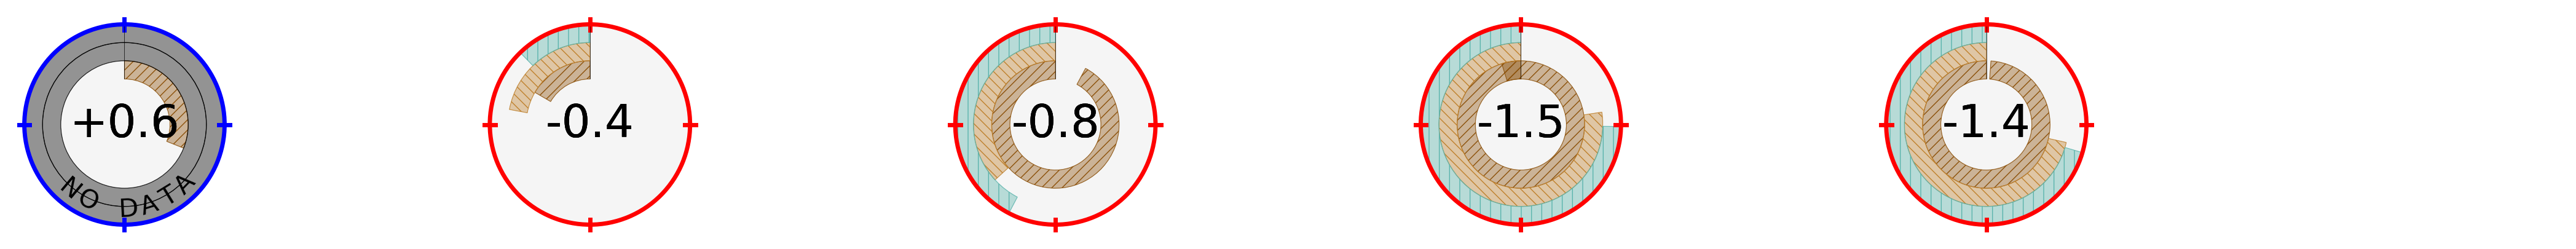

In [13]:
# create the figure and axis
fig, axs = plt.subplots(1, len(rings), figsize=(9.5*len(rings), 5), subplot_kw={'aspect': 'equal'})

for ax in axs:
    ax.set_xlim(-6.5, 6.5)
    ax.set_ylim(-6.5, 6.5)
    ax.axis("off")

# Red-Blue colormap
rdbu_cmap = plt.get_cmap("RdBu")
rdbu_norm = plt.Normalize(vmin=-5, vmax=5)

# Draw each ring as a wedge
a = 0.4
outer_color = ['b', 'r', 'r', 'r', 'r']
outer_lw = 5
dates = ['1938-1957', '1957-1978', '1978-2004', '2004-2012', '2012-2023']
for ax, d, outer_c in zip(axs, dates, outer_color):
    ax.plot([0, 0], [5.2, 5.8], color=outer_c, lw=outer_lw)
    ax.plot([5.2, 5.8], [0, 0], color=outer_c, lw=outer_lw)
    ax.plot([0, 0], [-5.2, -5.8], color=outer_c, lw=outer_lw)
    ax.plot([-5.2, -5.8], [0, 0], color=outer_c, lw=outer_lw)
    for radius, theta1, theta2, val, color, label, hatch in rings[d]:
        wedge = Wedge(center=(0, 0), r=radius, theta1=theta1, theta2=theta2, color=color, width=1, alpha=a)
        ax.add_patch(wedge)
        wedge_hatch = Wedge(center=(0, 0), r=radius, theta1=theta1, theta2=theta2, color='none', width=1, ec=color, lw=0.5, hatch=hatch)
        ax.add_patch(wedge_hatch)
        if theta2 >= 450:
            wedge2 = Wedge(center=(0, 0), r=radius, theta1=theta1, theta2=450, color=color, width=1, alpha=a)
            ax.add_patch(wedge2)
            wedge_hatch2 = Wedge(center=(0, 0), r=radius, theta1=theta1, theta2=450, color='none', width=1, ec=color, lw=0.5, hatch=hatch)
            ax.add_patch(wedge_hatch2)
        ax.annotate(f'{round(rings["Total"][d], 1):+}', (0,0), va='center', ha='center', size=53)
        if color == 'k' and radius == 4.5: # write text around circle
            angle_offset = 230  # starting angle 
            angles_letter = np.linspace(0, np.pi/1.8, len("NO DATA"), endpoint=False) + np.radians(angle_offset)
            for i, (char, angle) in enumerate(zip("NO DATA", angles_letter)):
                x = 4.7*np.cos(angle)
                y = 4.7*np.sin(angle)
                ax.text(x, y, char, rotation=np.degrees(angle + np.pi/2), va='center', ha='center', fontsize=30, color='k')
    
    # Add a gray semicircle for the unused area
    ax.add_patch(Wedge(center=(0, 0), r=5.5, theta1=0, theta2=360, color='whitesmoke', ec='none', alpha=1, zorder=0))
    ax.add_patch(Wedge(center=(0, 0), r=5.5, theta1=0, theta2=360, color='none', ec=outer_c, lw=outer_lw, zorder=10))
    ax.plot([0, 0], [2.5, 5.5], color='k', lw=0.5)


plt.show()


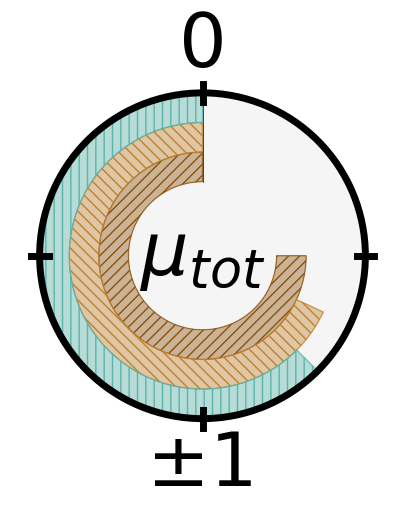

In [14]:
# create the figure and axis
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'aspect': 'equal'})

ax.set_xlim(-6.5, 6.5)
ax.set_ylim(-6.5, 6.5)
ax.axis("off")
    
# Draw each ring as a wedge
a = 0.4
ring = [(3.5, 90, 0, colors[0], 'Terminus', '///'), 
        (4.5, 90, -25, colors[1], 'Kennicott', '\\\\\\'), 
        (5.5, 90, -45, colors[2], 'Root', '||')]
outer_lw = 5

for radius, theta1, theta2, color, label, hatch in ring:
    wedge = Wedge(center=(0, 0), r=radius, theta1=theta1, theta2=theta2, color=color, width=1, alpha=a)
    ax.add_patch(wedge)
    wedge_hatch = Wedge(center=(0, 0), r=radius, theta1=theta1, theta2=theta2, color='none', width=1, ec=color, lw=0.5, hatch=hatch)
    ax.add_patch(wedge_hatch)


# # Add labels for each temperature level on the right side
# labels = ["1.5°C", "2°C", "3°C"]
# for i, (label, color) in enumerate(zip(labels, colors)):
#     ax.text(2.25, 5 - i * 0.7, label, color=color, fontsize=24, ha='left')

# ax.text(2.25, 5, 'Elevation change (m yr$^{-1}$)', color='k', fontsize=24, ha='center', va='bottom')

# Add a gray semicircle for the unused area
ax.add_patch(Wedge(center=(0, 0), r=5.5, theta1=0, theta2=360, color='whitesmoke', ec='k', alpha=1, zorder=0))
ax.add_patch(Wedge(center=(0, 0), r=5.5, theta1=0, theta2=360, color='none', ec='k', lw=outer_lw, zorder=10))
ax.plot([0, 0], [2.5, 5.5], color='k', lw=0.5)

# Add labels at 90 and 180 degrees
ax.plot([0, 0], [5.2, 5.8], color='k', lw=outer_lw)
ax.plot([5.2, 5.8], [0, 0], color='k', lw=outer_lw)
ax.plot([0, 0], [-5.2, -5.8], color='k', lw=outer_lw)
ax.plot([-5.2, -5.8], [0, 0], color='k', lw=outer_lw)
ax.text(0, 5.85, '0', size=54, ha='center', va='bottom')
# ax.text(5.85, 0, '0.5', size=54, ha='left', va='center')
ax.text(0, -5.85, '±1', size=54, ha='center', va='top')
# ax.text(-5.85, 0, '1.5', size=54, ha='right', va='center')
# ax.text(0, -5.85, 'm yr$^{-1}$', size=54, ha='center', va='top')
ax.text(0, 0, r'$\mu_{tot}$', size=54, ha='center', va='center') # are we annotating the center?


plt.show()


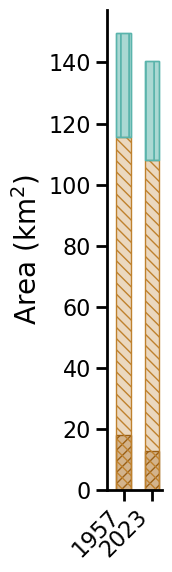

In [15]:
# Data for each category in 1957 and 2023
values_1957 = [17.8, 115.7, 34.0, 10]  # Replace with actual values for 1957
values_2023 = [12.6, 108.1, 32.3, 10]  # Replace with actual values for 2023
hatches = ['///', '\\\\\\', '||', None]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(2, 6))
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
x = [1, 3] # bar positions
a = 0.3
w = 1

ax.plot(0, 0, color='none')
# ax.plot(2, 0, color='none')

# Stacked bar plots
ax.bar(x[0], values_1957[0], color=colors[0], width=w, alpha=a)
ax.bar(x[0], values_1957[0], color='none', width=w, ec=colors[0], hatch=hatches[0])
ax.bar(x[0], values_1957[1], color=colors[1], width=w, alpha=a)
ax.bar(x[0], values_1957[1], color='none', width=w, ec=colors[1], hatch=hatches[1])
ax.bar(x[0], values_1957[2], bottom=values_1957[1], color=colors[2], width=w, alpha=a)
ax.bar(x[0], values_1957[2], bottom=values_1957[1], color='none', width=w, ec=colors[2], hatch=hatches[2])
ax.bar(x[0], values_1957[2], bottom=values_1957[1], color=colors[2], width=w, alpha=a)
ax.bar(x[0], values_1957[2], bottom=values_1957[1], color='none', width=w, ec=colors[2], hatch=hatches[2])
# ax.bar(x[0], values_1957[3], bottom=np.sum(values_1957[1:3]), color='w', width=w, alpha=a)
# ax.bar(x[0], values_1957[3], bottom=np.sum(values_1957[1:3]), color='none', width=w, ec='grey', lw=0.5, hatch=hatches[3])

ax.bar(x[1], values_2023[0], color=colors[0], width=w, alpha=a)
ax.bar(x[1], values_2023[0], color='none', width=w, ec=colors[0], hatch=hatches[0])
ax.bar(x[1], values_2023[1], color=colors[1], width=w, alpha=a)
ax.bar(x[1], values_2023[1], color='none', width=w, ec=colors[1], hatch=hatches[1])
ax.bar(x[1], values_2023[2], bottom=values_2023[1], color=colors[2], width=w, alpha=a)
ax.bar(x[1], values_2023[2], bottom=values_2023[1], color='none', width=w, ec=colors[2], hatch=hatches[2])
ax.bar(x[1], values_2023[2], bottom=values_2023[1], color=colors[2], width=w, alpha=a)
ax.bar(x[1], values_2023[2], bottom=values_2023[1], color='none', width=w, ec=colors[2], hatch=hatches[2])
# ax.bar(x[1], values_2023[3], bottom=np.sum(values_2023[1:3]), color='w', width=w, alpha=a)
# ax.bar(x[1], values_2023[3], bottom=np.sum(values_2023[1:3]), color='none', width=w, ec='grey', lw=0.5, hatch=hatches[3])

# Labels and title
ax.set_xticks(x)
ax.set_xticklabels(['1957', '2023'], rotation=45, ha='right')
ax.set_ylabel('Area (km$^2$)')
ax.tick_params(axis='both', length=8, width=2)

fig.tight_layout()
plt.show()
